In [95]:
import pandas as pd
import geopandas as gpd
#import json
#import simplejson
from matplotlib import pyplot as plt
import numpy as np
import datetime
import csv
from shapely.geometry import Point
import time
from dateutil.parser import parse
import pandas as pd 
#import folium
#from folium.plugins import HeatMap
#import yelp

#import json_to_csv_converter
%matplotlib inline

In [96]:
rest = pd.read_csv('lateNightRest.csv')
rest = rest[['restaurant_name', 'restaurant_location_state', 'restaurant_location_zip_code', 'restaurant_location_city',
             'restaurant_coordinates_latitude', 'restaurant_coordinates_longitude', 'restaurant_rating', 'restaurant_price']]
rest = rest[(rest.restaurant_location_state == 'NY')]
rest = rest[(rest.restaurant_location_city == 'New York')]
rest['lonlat']=list(zip(rest.restaurant_coordinates_longitude,rest.restaurant_coordinates_longitude))
geometry = [Point(xy) for xy in zip(rest.restaurant_coordinates_longitude, rest.restaurant_coordinates_latitude)]
crs = {'init': 'epsg:4326'}
rest = gpd.GeoDataFrame(rest, crs=crs, geometry=geometry)
rest.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,"(-73.9792299271, -73.9792299271)",POINT (-73.97922992709999 40.7617559583)
2,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,"(-74.0048000962, -74.0048000962)",POINT (-74.0048000962 40.7422762672)
3,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,"(-73.98649, -73.98649)",POINT (-73.98649 40.74828)
4,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,"(-73.9887357, -73.9887357)",POINT (-73.98873570000001 40.7214961)
5,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,"(-73.9971172437, -73.9971172437)",POINT (-73.9971172437 40.7150363829)


In [97]:
zips = gpd.read_file('ZIP_CODE_040114.shp')
zips['ZIPCODE'] = zips['ZIPCODE'].astype(int)
manZips = [10000+i for i in range(300)]
zips = zips[(zips['ZIPCODE'].isin(manZips))]
zips.to_crs(epsg=4326, inplace=True)
zips.head()

,ZIPCODE,BLDGZIP,PO_NAME,POPULATION,AREA,STATE,COUNTY,ST_FIPS,CTY_FIPS,URL,SHAPE_AREA,SHAPE_LEN,geometry
21,10034,0,New York,39149.0,2.450389e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.92062094886886 40.87300145746759...
22,10033,0,New York,54284.0,1.615605e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,"POLYGON ((-73.9321312654303 40.86945031866859,..."
24,10040,0,New York,41033.0,1.634074e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.93378898733548 40.86307153891338...
32,10032,0,New York,57606.0,2.315957e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.94691631062136 40.85053363144751...
36,10031,0,New York,57010.0,1.690215e+07,NY,New York,36,061,http://www.usps.com/,0.0,0.0,POLYGON ((-73.94008773937043 40.83034934467172...


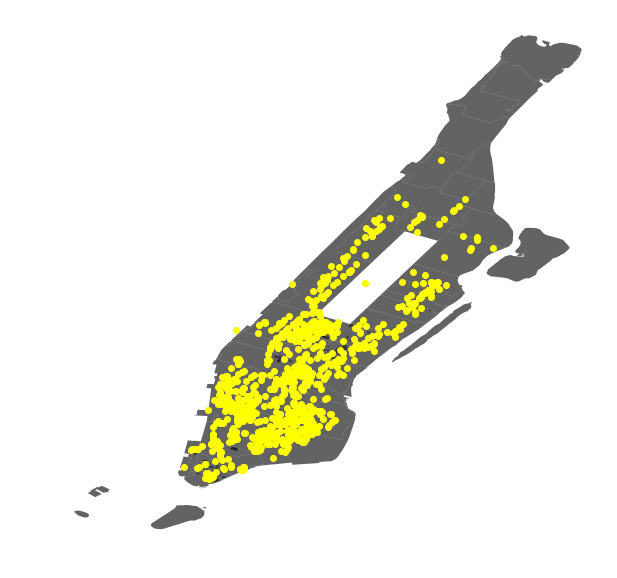

In [98]:
f, ax = plt.subplots(figsize=(10,10))
zips.plot(figsize=(8,8), color='black', ax=ax, alpha=100)
rest.plot(ax=ax, color='yellow')
ax.set_axis_off()

In [99]:
rest['hashtag'] = rest['restaurant_name'].str.replace(" ", "")
rest['hashtags'] = rest['hashtag'].str.lower()
rest.head()

,restaurant_name,restaurant_location_state,restaurant_location_zip_code,restaurant_location_city,restaurant_coordinates_latitude,restaurant_coordinates_longitude,restaurant_rating,restaurant_price,lonlat,geometry,hashtag,hashtags
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,"(-73.9792299271, -73.9792299271)",POINT (-73.97922992709999 40.7617559583),TheHalalGuys,thehalalguys
2,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,"(-74.0048000962, -74.0048000962)",POINT (-74.0048000962 40.7422762672),Buddakan,buddakan
3,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,"(-73.98649, -73.98649)",POINT (-73.98649 40.74828),TurntableChickenJazz,turntablechickenjazz
4,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,"(-73.9887357, -73.9887357)",POINT (-73.98873570000001 40.7214961),TheMeatballShop,themeatballshop
5,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,"(-73.9971172437, -73.9971172437)",POINT (-73.9971172437 40.7150363829),GreatNYNoodleTown,greatnynoodletown


In [100]:
rest50 = gpd.read_file('count50Sept.shp')
rest50.head()

,restaurant,restaura_1,restaura_2,restaura_3,restaura_4,restaura_5,restaura_6,restaura_7,hashtag,hashtags,restaura_8,hashtags_s,geometry
0,The Halal Guys,NY,10019.0,New York,40.761756,-73.979230,4.0,$,TheHalalGuys,thehalalguys,thehalalguys,352,POINT (-73.97922992709999 40.7617559583)
1,Buddakan,NY,10011.0,New York,40.742276,-74.004800,4.0,$$$,Buddakan,buddakan,buddakan,32,POINT (-74.0048000962 40.7422762672)
2,Turntable Chicken Jazz,NY,10001.0,New York,40.748280,-73.986490,4.0,$$,TurntableChickenJazz,turntablechickenjazz,turntablechickenjazz,0,POINT (-73.98649 40.74828)
3,The Meatball Shop,NY,10002.0,New York,40.721496,-73.988736,4.0,$$,TheMeatballShop,themeatballshop,themeatballshop,68,POINT (-73.98873570000001 40.7214961)
4,Great NY Noodle Town,NY,10013.0,New York,40.715036,-73.997117,3.5,$,GreatNYNoodleTown,greatnynoodletown,greatnynoodletown,2,POINT (-73.9971172437 40.7150363829)


In [101]:
rest50.rename(columns={'restaura_3':'zip', 'hashtags_s':'hashtags_sept', 'restaura_4':'latitude',
                       'restaura_5':'longitude'}, inplace=True)

In [102]:
type(rest50)

geopandas.geodataframe.GeoDataFrame

In [103]:
rest50 = rest50[['restaurant', 'zip', 'hashtags_sept', 'geometry', 'latitude', 'longitude']]
rest50.head()

,restaurant,zip,hashtags_sept,geometry,latitude,longitude
0,The Halal Guys,New York,352,POINT (-73.97922992709999 40.7617559583),40.761756,-73.979230
1,Buddakan,New York,32,POINT (-74.0048000962 40.7422762672),40.742276,-74.004800
2,Turntable Chicken Jazz,New York,0,POINT (-73.98649 40.74828),40.748280,-73.986490
3,The Meatball Shop,New York,68,POINT (-73.98873570000001 40.7214961),40.721496,-73.988736
4,Great NY Noodle Town,New York,2,POINT (-73.9971172437 40.7150363829),40.715036,-73.997117


In [104]:
rest35050 = gpd.read_file('count35050Sept.shp')
rest35050.head()

,restaurant,zip,hashtags_s,latitude,longitude,geometry
0,Piacere,10013.0,2,40.719698,-73.995118,POINT (-73.99511750000001 40.7196979)
1,Hangawi,10016.0,279,40.746737,-73.984662,POINT (-73.984662 40.746737)
2,Cibar,10003.0,10,40.735960,-73.986960,POINT (-73.98696 40.73596)
3,Fonda East Village,10009.0,0,40.722852,-73.982860,POINT (-73.98286 40.722852)
4,Gran Morsi,10007.0,2,40.714328,-74.007751,POINT (-74.007751 40.714328)


In [105]:
rest35050.rename(columns={'hashtags_s':'hashtags_sept'}, inplace=True)
rest35050.head()

,restaurant,zip,hashtags_sept,latitude,longitude,geometry
0,Piacere,10013.0,2,40.719698,-73.995118,POINT (-73.99511750000001 40.7196979)
1,Hangawi,10016.0,279,40.746737,-73.984662,POINT (-73.984662 40.746737)
2,Cibar,10003.0,10,40.735960,-73.986960,POINT (-73.98696 40.73596)
3,Fonda East Village,10009.0,0,40.722852,-73.982860,POINT (-73.98286 40.722852)
4,Gran Morsi,10007.0,2,40.714328,-74.007751,POINT (-74.007751 40.714328)


In [106]:
frames = [rest50, rest35050]
Sept100 = pd.concat(frames)
Sept100.head()

,geometry,hashtags_sept,latitude,longitude,restaurant,zip
0,POINT (-73.97922992709999 40.7617559583),352,40.761756,-73.979230,The Halal Guys,New York
1,POINT (-74.0048000962 40.7422762672),32,40.742276,-74.004800,Buddakan,New York
2,POINT (-73.98649 40.74828),0,40.748280,-73.986490,Turntable Chicken Jazz,New York
3,POINT (-73.98873570000001 40.7214961),68,40.721496,-73.988736,The Meatball Shop,New York
4,POINT (-73.9971172437 40.7150363829),2,40.715036,-73.997117,Great NY Noodle Town,New York


In [107]:
len(Sept100)

99

In [108]:
rest30050 = gpd.read_file('count30050Sept.shp')
rest30050.head()

,restaurant,zip,hashtags_s,latitude,longitude,geometry
0,Louie and Chan,10002.0,5,40.718712,-73.992406,POINT (-73.9924058 40.71871179999999)
1,Sing Sing Ave.A,10009.0,0,40.725196,-73.984519,POINT (-73.98451899999999 40.725196)
2,Cocoa Bar,10002.0,56,40.720710,-73.984340,POINT (-73.9843401 40.7207104)
3,Sotto 13,10011.0,4,40.737200,-73.999190,POINT (-73.99919 40.7372)
4,Anyway Cafe,10003.0,7,40.725002,-73.990601,POINT (-73.9906009 40.72500170000001)


In [109]:
rest30050.rename(columns={'hashtags_s':'hashtags_sept'}, inplace=True)
rest30050.head()

,restaurant,zip,hashtags_sept,latitude,longitude,geometry
0,Louie and Chan,10002.0,5,40.718712,-73.992406,POINT (-73.9924058 40.71871179999999)
1,Sing Sing Ave.A,10009.0,0,40.725196,-73.984519,POINT (-73.98451899999999 40.725196)
2,Cocoa Bar,10002.0,56,40.720710,-73.984340,POINT (-73.9843401 40.7207104)
3,Sotto 13,10011.0,4,40.737200,-73.999190,POINT (-73.99919 40.7372)
4,Anyway Cafe,10003.0,7,40.725002,-73.990601,POINT (-73.9906009 40.72500170000001)


In [110]:
frames = [rest30050, Sept100]
Sept150 = pd.concat(frames)
Sept150.head()

,geometry,hashtags_sept,latitude,longitude,restaurant,zip
0,POINT (-73.9924058 40.71871179999999),5,40.718712,-73.992406,Louie and Chan,10002
1,POINT (-73.98451899999999 40.725196),0,40.725196,-73.984519,Sing Sing Ave.A,10009
2,POINT (-73.9843401 40.7207104),56,40.720710,-73.984340,Cocoa Bar,10002
3,POINT (-73.99919 40.7372),4,40.737200,-73.999190,Sotto 13,10011
4,POINT (-73.9906009 40.72500170000001),7,40.725002,-73.990601,Anyway Cafe,10003


In [111]:
len(Sept150)

146

In [112]:
type(Sept150)

geopandas.geodataframe.GeoDataFrame

In [113]:
Sept150.to_file('SeptData.shp', driver='ESRI Shapefile')

In [114]:
data = gpd.read_file('SeptData.shp')
type(data)

geopandas.geodataframe.GeoDataFrame

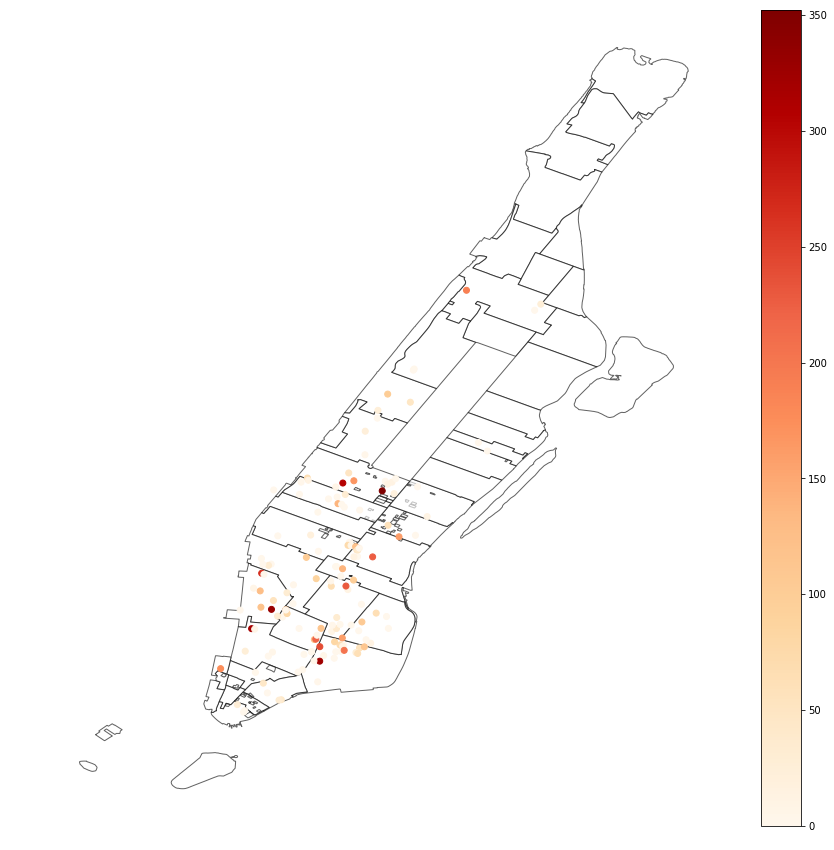

In [115]:
f, ax = plt.subplots(figsize=(15,15))
zips.plot(figsize=(15,15), color='white', edgecolor='black', ax=ax, alpha=100,)
Sept150.plot(column='hashtags_sept', ax=ax, k=10, cmap='OrRd', legend=True)
ax.set_axis_off()

In [116]:
import folium
from folium.plugins import HeatMap
max_amount = float(Sept150['hashtags_sept'].max())

hmap = folium.Map(location=[40.7128, -74.0060], zoom_start=13, )
hm_wide = HeatMap( list(zip(Sept150.latitude.values, Sept150.longitude.values, Sept150.hashtags_sept.values)),
                   min_opacity=0.2,
                   max_val=max_amount,
                   radius=17, blur=15, 
                   max_zoom=1, 
                 )
hmap.add_child(hm_wide)

ImportError: No module named 'folium'

In [117]:
taxiData = pd.read_csv('tlc1-Copy1.csv')
taxiData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.0,1,N,145,145,2,3.0,0.5,0.5,0.00,0.0,0.3,4.30
1,1,2018-06-01 00:04:18,2018-06-01 00:09:18,1,1.0,1,N,230,161,1,5.5,0.5,0.5,1.35,0.0,0.3,8.15
2,1,2018-06-01 00:14:39,2018-06-01 00:29:46,1,3.3,1,N,100,263,2,13.0,0.5,0.5,0.00,0.0,0.3,14.30
3,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80
4,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.0,1,N,145,145,2,2.5,0.5,0.5,0.00,0.0,0.3,3.80


In [118]:
taxiShape = gpd.read_file('taxi_zones.shp')
taxiShape.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.9183527103 192536.0856972019,..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"(POLYGON ((1033269.243591294 172126.0078125, 1..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.769506663 256767.6975403726,..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.3104932606 144283.335850656, ..."


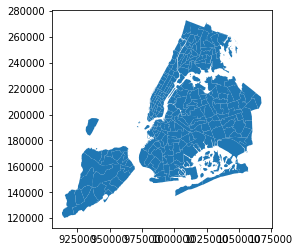

In [119]:
taxiShape.plot()

In [120]:
taxiData = taxiData.merge(taxiShape, left_on='PULocationID', right_on='LocationID', how='inner')

In [121]:
taxiData.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,tolls_amount,improvement_surcharge,total_amount,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,2018-06-01 00:15:40,2018-06-01 00:16:46,1,0.00,1,N,145,145,2,...,0.0,0.3,4.30,145,0.114314,0.000347,Long Island City/Hunters Point,145,Queens,"POLYGON ((999916.8460159451 213275.1389357746,..."
1,1,2018-06-01 00:51:25,2018-06-01 00:51:29,3,0.00,1,N,145,145,2,...,0.0,0.3,3.80,145,0.114314,0.000347,Long Island City/Hunters Point,145,Queens,"POLYGON ((999916.8460159451 213275.1389357746,..."
2,1,2018-06-01 00:55:06,2018-06-01 00:55:10,1,0.00,1,N,145,145,2,...,0.0,0.3,3.80,145,0.114314,0.000347,Long Island City/Hunters Point,145,Queens,"POLYGON ((999916.8460159451 213275.1389357746,..."
3,2,2018-06-01 00:34:15,2018-06-01 00:46:14,1,3.21,1,N,145,223,1,...,0.0,0.3,13.80,145,0.114314,0.000347,Long Island City/Hunters Point,145,Queens,"POLYGON ((999916.8460159451 213275.1389357746,..."
4,1,2018-06-01 00:25:25,2018-06-01 00:41:49,1,6.60,1,N,145,95,1,...,0.0,0.3,25.75,145,0.114314,0.000347,Long Island City/Hunters Point,145,Queens,"POLYGON ((999916.8460159451 213275.1389357746,..."


In [122]:
taxiData.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'OBJECTID', 'Shape_Leng', 'Shape_Area', 'zone',
       'LocationID', 'borough', 'geometry'],
      dtype='object')

In [123]:
taxiData = taxiData[['tpep_pickup_datetime', 'PULocationID', 'DOLocationID', 'fare_amount', 'Shape_Leng', 'Shape_Area',
                     'geometry', 'borough']]
taxiData.head()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry,borough
0,2018-06-01 00:15:40,145,145,3.0,0.114314,0.000347,"POLYGON ((999916.8460159451 213275.1389357746,...",Queens
1,2018-06-01 00:51:25,145,145,2.5,0.114314,0.000347,"POLYGON ((999916.8460159451 213275.1389357746,...",Queens
2,2018-06-01 00:55:06,145,145,2.5,0.114314,0.000347,"POLYGON ((999916.8460159451 213275.1389357746,...",Queens
3,2018-06-01 00:34:15,145,223,12.5,0.114314,0.000347,"POLYGON ((999916.8460159451 213275.1389357746,...",Queens
4,2018-06-01 00:25:25,145,95,20.5,0.114314,0.000347,"POLYGON ((999916.8460159451 213275.1389357746,...",Queens


In [124]:
taxiData.groupby(by='borough').count()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry
borough,,,,,,,
Bronx,10214,10214,10214,10214,10214,10214,10214
Brooklyn,122961,122961,122961,122961,122961,122961,122961
EWR,678,678,678,678,678,678,678
Manhattan,7878796,7878796,7878796,7878796,7878796,7878796,7878796
Queens,575101,575101,575101,575101,575101,575101,575101
Staten Island,151,151,151,151,151,151,151


In [125]:
taxiData = taxiData[(taxiData.borough == 'Manhattan')]
taxiData.head()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry,borough
10110,2018-06-01 00:04:18,230,161,5.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan
10111,2018-06-01 00:24:29,230,179,22.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan
10112,2018-06-01 00:03:22,230,137,7.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan
10113,2018-06-01 00:48:00,230,163,4.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan
10114,2018-06-01 00:57:53,230,163,7.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan


In [126]:
taxiData['tpep_pickup_datetime'] = taxiData['tpep_pickup_datetime'].astype(str)

In [127]:
taxiData['hour'] = taxiData['tpep_pickup_datetime'].map(lambda x: int(x.split(" ")[1].split(':')[0]))
taxiData = taxiData[taxiData['hour'].isin([21,22,23,24,1,2,3,4])]
taxiData.head()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry,borough,hour
10264,2018-05-31 23:59:36,230,170,5.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23
10332,2018-05-31 23:59:28,230,186,4.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23
10341,2018-05-31 23:49:23,230,116,24.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23
10349,2018-05-31 23:57:59,230,237,11.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23
10360,2018-05-31 23:59:31,230,164,5.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23


In [128]:
taxiData["time"] = pd.to_datetime(taxiData["tpep_pickup_datetime"])
taxiData.head()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry,borough,hour,time
10264,2018-05-31 23:59:36,230,170,5.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:36
10332,2018-05-31 23:59:28,230,186,4.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:28
10341,2018-05-31 23:49:23,230,116,24.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:49:23
10349,2018-05-31 23:57:59,230,237,11.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:57:59
10360,2018-05-31 23:59:31,230,164,5.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:31


In [129]:
start = datetime.time(21, 0, 0)
end = datetime.time(4, 0, 0)

In [130]:
type(taxiData['time'].values[0])

numpy.datetime64

In [131]:
type(start)

datetime.time

In [132]:
#from datetime import datetime
#date_format = "%d/%m/%Y"
#taxiDataNight1 = datetime.strptime(taxiData.time,date_format)


TypeError: strptime() argument 1 must be str, not Series

In [ ]:
#taxiDataNight1 = taxiData(taxiData.time > start)

In [ ]:
#taxiDataNight1.tail()

In [ ]:
#taxiDataNight1.shape

In [ ]:
#taxiDataNight2 = taxiData[(taxiData.time < end)]

In [ ]:
#taxiDataNight2.shape

In [ ]:
#frames = [taxiDataNight1, taxiDataNight2]
#taxiDataNight = pd.concat(frames)
#taxiDataNight.shape

In [ ]:
#type(taxiDataNight)

In [133]:
taxiData.head()

,tpep_pickup_datetime,PULocationID,DOLocationID,fare_amount,Shape_Leng,Shape_Area,geometry,borough,hour,time
10264,2018-05-31 23:59:36,230,170,5.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:36
10332,2018-05-31 23:59:28,230,186,4.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:28
10341,2018-05-31 23:49:23,230,116,24.0,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:49:23
10349,2018-05-31 23:57:59,230,237,11.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:57:59
10360,2018-05-31 23:59:31,230,164,5.5,0.031028,0.000056,"POLYGON ((988786.8773103654 214532.0940539986,...",Manhattan,23,2018-05-31 23:59:31


In [134]:
taxiData = taxiData.groupby(by='PULocationID').count()

In [135]:
taxiData['PULocationID'] = taxiData.index
taxiData.reset_index(drop=True, inplace=True)
taxiData = taxiData[['PULocationID', 'hour']]
taxiData.head()

,PULocationID,hour
0,4,6066
1,12,621
2,13,12233
3,24,3974
4,41,7814


In [136]:
taxiData = taxiData.merge(taxiShape, left_on='PULocationID', right_on='LocationID', how='inner')
taxiData.head()

,PULocationID,hour,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,4,6066,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.4667968601 203714.0759887695,..."
1,12,621,12,0.036661,0.000042,Battery Park,12,Manhattan,"POLYGON ((979908.771901235 196066.5651661754, ..."
2,13,12233,13,0.050281,0.000149,Battery Park City,13,Manhattan,"POLYGON ((980801.3095727563 201248.8694928288,..."
3,24,3974,24,0.047000,0.000061,Bloomingdale,24,Manhattan,"POLYGON ((995453.1139255464 230274.2667761594,..."
4,41,7814,41,0.052793,0.000143,Central Harlem,41,Manhattan,"POLYGON ((998716.9128961712 234240.3971749842,..."


In [137]:
type(taxiData)

pandas.core.frame.DataFrame

In [139]:
crs = {'init': 'epsg:4326'}
taxiData = gpd.GeoDataFrame(taxiData, crs=crs, geometry='geometry')

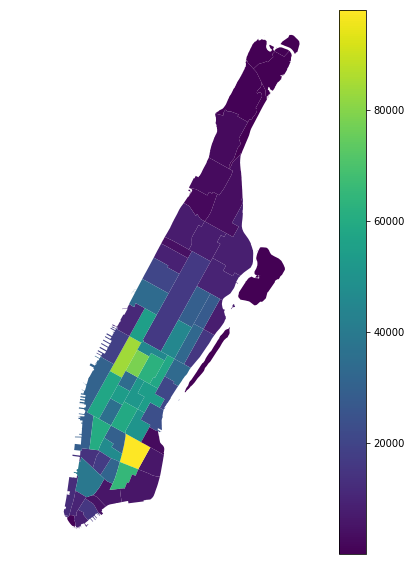

In [140]:
ax = taxiData.plot(column='hour', figsize=(10,10), k=10, legend=True)
ax.set_axis_off()